# Synthetic Data Experiments

In [1]:
import numpy as np
import dill
import sys
import importlib
import itertools

sys.path.append('../src')
import policies 
import bbDebiasing
import maxEnsembleDebias

sys.path.append('experiment-pipeline')
import analysisHelp
importlib.reload(analysisHelp);

# Linear Labels, with Models Trained by Coordinate

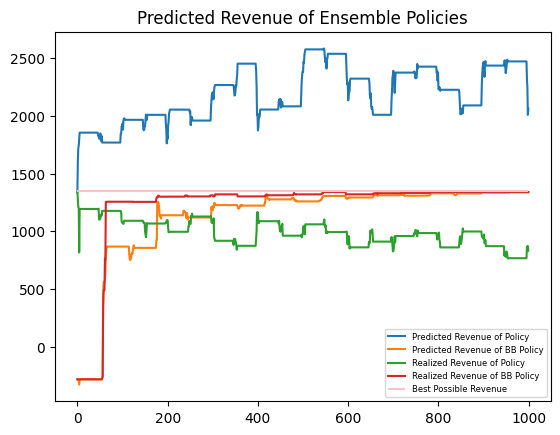

In [5]:
bbPath = 'experiment-pipeline/debiased-models/poly-label_gb_group_variance_BBModel.pkl'
maxEnsemblePath = 'experiment-pipeline/debiased-models/poly-label_gb_group_variance_MaxEnsemble.pkl'
figPath='experiment-pipeline/figs/poly-label_gb_group_variance'
experimentName='poly-label_gb_group_variance'

analysisHelp.allPlots(bbPath, maxEnsemblePath, figPath=figPath, experimentName=experimentName)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-05-16


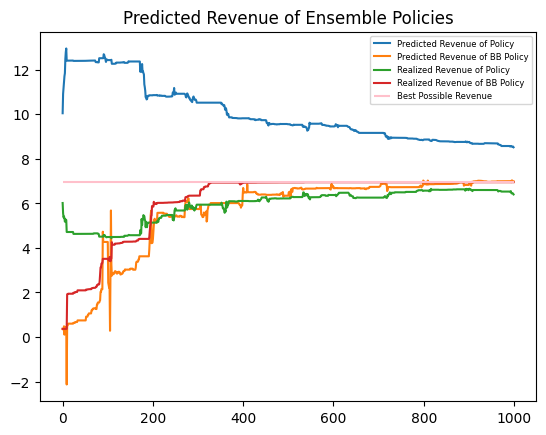

In [11]:
label_types = ['poly-label', 'linear-label']
model_types = ['lin', 'gb']
spec_types = ['group', 'coord', 'all']
policy_types = ['variance']

for (label, model, spec, policy) in itertools.product(label_types, model_types, spec_types, policy_types):

    bbPath = f"experiment-pipeline/debiased-models/{label}_{model}_{spec}_{policy}_BBModel.pkl"
    maxEnsemblePath = f"experiment-pipeline/debiased-models/{label}_{model}_{spec}_{policy}_MaxEnsemble.pkl"
    figPath = f"experiment-pipeline/figs/{label}_{model}_{spec}_{policy}"
    experimentName=f"{label}_{model}_{spec}_{policy}"
    
    analysisHelp.allPlots(bbPath, maxEnsemblePath, figPath=figPath, experimentName=experimentName, params = (label, model, spec, policy))



In [2]:
bbPath = 'experiment-pipeline/debiased-models/linear-label_gb_coord_linear-constraint_2_subsample400_BBModel.pkl'
maxEnsemblePath = 'experiment-pipeline/debiased-models/linear-label_gb_coord_linear-constraint_2_subsample400_MaxEnsemble.pkl'
with open(bbPath, 'rb') as file:
    bbModel = dill.load(file)
with open(maxEnsemblePath, 'rb') as file:
    maxModel = dill.load(file)

Text(0.5, 0, 'Round of Debiasing')

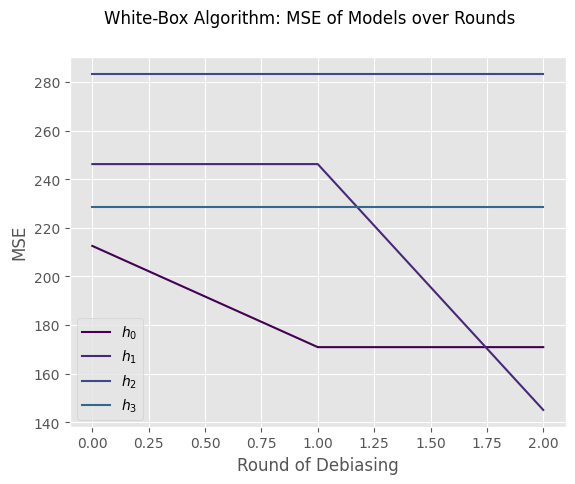

In [8]:
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

mses = np.array([mse(bbModel.train_y, pred) for pred in bbModel.predictions_by_round])
plt.plot(np.arange(len(mses)), mses)
plt.suptitle("Black-box Algorithm: MSE over Rounds of Debiasing")
plt.ylabel('MSE')
plt.xlabel('Round of Debiasing')

preds = np.array(maxModel.predictions_by_round)
preds_by_model = [preds[:,i] for i in range(maxModel.n_models)]
mses_by_model = np.zeros((len(preds_by_model), len(preds)))
for i in range(maxModel.n_models):
    for j in range(len(preds_by_model[i])):
        mses_by_model[i][j] = mse(maxModel.train_y, preds_by_model[i][j])

plt.clf()
for i in range(maxModel.n_models):
    plt.plot(np.arange(len(maxModel.predictions_by_round)), mses_by_model[i], label=f"$h_{i}$")
plt.legend()
plt.suptitle("White-Box Algorithm: MSE of Models over Rounds")
plt.ylabel('MSE')
plt.xlabel('Round of Debiasing')

In [24]:
bb_bias_array = np.array(bbModel.bias_array)
max_bias_array = np.array(maxModel.bias_array)[:,1,:]

Text(0.5, 1.0, 'Bias in 1st Coordinate of Models')

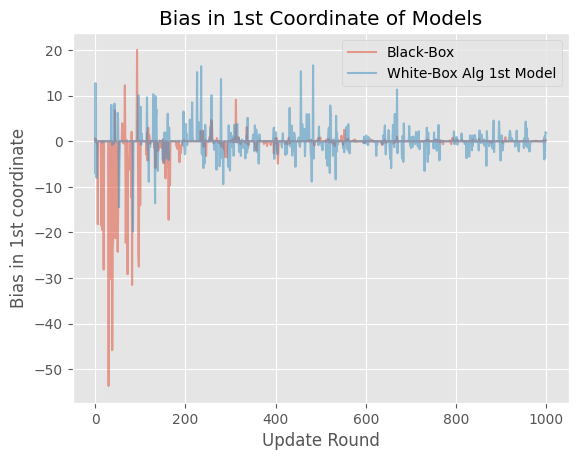

In [38]:
import matplotlib.pyplot as plt 

plt.rcParams['figure.facecolor'] = '#d9d9d9'
plt.plot(bb_bias_array[:,0], label='Black-Box', alpha=0.5)
plt.plot(max_bias_array[:,0], label='White-Box Alg 1st Model', alpha=0.5)
plt.legend()
plt.xlabel("Update Round")
plt.ylabel("Bias in 1st coordinate")
plt.title("Bias in 1st Coordinate of Models")

In [26]:
max_bias_array.shape

(1000, 4)

(1000, 4)

In [5]:
bbPath = 'experiment-pipeline/debiased-models/linear-label_gb_group_variance_5000_subsample400_BBModel.pkl'
# maxEnsemblePath = 'experiment-pipeline/debiased-models/linear-label_gb_group_variance_MaxEnsemble.pkl'
with open(bbPath, 'rb') as file:
    bbModel = dill.load(file)
# with open(maxEnsemblePath, 'rb') as file:
#     maxModel = dill.load(file)

In [6]:
bbModel

UnboundLocalError: cannot access local variable 'labelstr' where it is not associated with a value

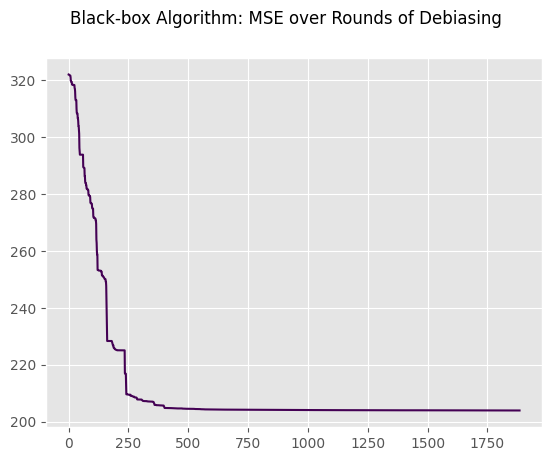

In [7]:
params = ('a','a','a','a')
analysisHelp.BBMSE(bbModel, params)

In [3]:
maxEnsemblePath = 'experiment-pipeline/debiased-models/linear-label_gb_coord_variance_MaxEnsemble.pkl'
with open(maxEnsemblePath, 'rb') as file:
    maxModel = dill.load(file)

(array([41.,  0.,  0., 84.,  0.,  0., 62.,  0.,  0., 63.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

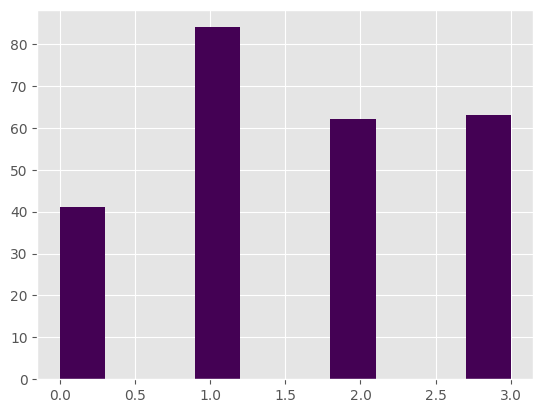

In [11]:
import matplotlib.pyplot as plt

plt.hist(maxModel.max_policy_index_by_round[-1])

Text(0.5, 1.0, 'Policy Used by Ensemble Over Rounds of Debiasing')

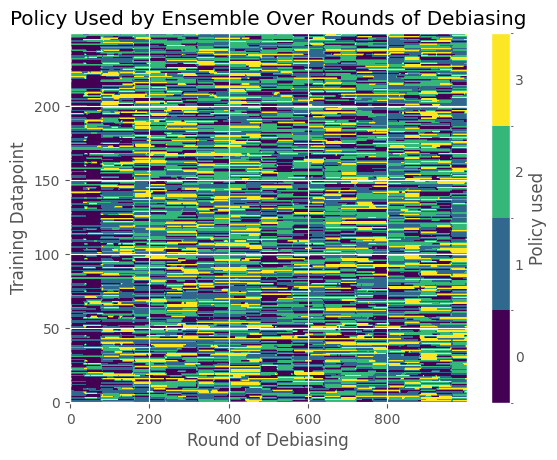

In [78]:
from matplotlib.colors import ListedColormap, BoundaryNorm

n_colors = 4
# Choose a colormap
colormap = plt.get_cmap('viridis')
# Generate colors from the colormap
colors = [colormap(i) for i in np.linspace(0, 1, n_colors)]
# Regenerate discrete version of colormap 
cmap = ListedColormap(colors)

bounds = np.linspace(0, n_colors, n_colors + 1) - 0.5  # Bins edges
norm = BoundaryNorm(bounds, cmap.N)

plt.imshow(np.array(maxModel.max_policy_index_by_round).T, 
           cmap=cmap, norm=norm, aspect='auto', origin='lower')
cbar = plt.colorbar(ticks=np.arange(0, n_colors), spacing='uniform', label='Policy used')
cbar.ax.tick_params(size=0)
plt.xlabel('Round of Debiasing')
plt.ylabel('Training Datapoint')
plt.title('Policy Used by Ensemble Over Rounds of Debiasing')

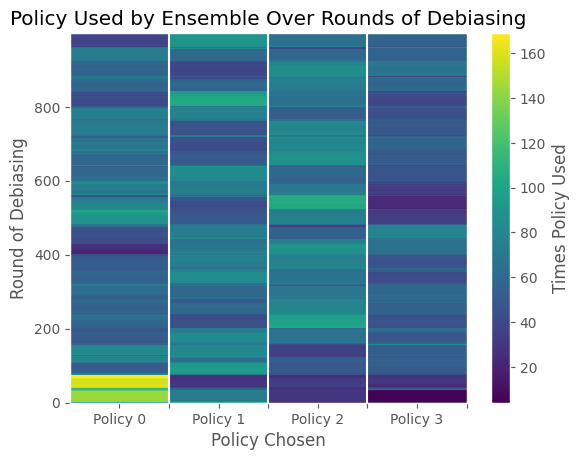

In [81]:
from matplotlib.colors import ListedColormap, BoundaryNorm

max_policies = np.array(maxModel.max_policy_index_by_round)
hist_over_rounds = np.apply_along_axis(lambda row: np.histogram(row, bins=4)[0], axis=1, arr=max_policies)

cmap = plt.get_cmap('viridis')

plt.imshow(hist_over_rounds, 
           cmap=cmap, aspect='auto', origin='lower', interpolation='None')
cbar = plt.colorbar(label='Times Policy Used')
#cbar.ax.tick_params(size=0)
plt.xlabel('Policy Chosen')
plt.ylabel('Round of Debiasing')
plt.xticks(ticks=np.arange(0,4,0.5), labels=['Policy 0','', 'Policy 1','', 'Policy 2','', 'Policy 3',''])
plt.title('Policy Used by Ensemble Over Rounds of Debiasing')
plt.grid(False)
plt.vlines([0.5,1.5,2.5],0, 999, color='white')

In [77]:
np.arange(1, n_colors+1)

array([1, 2, 3, 4])

In [45]:
np.histogram(foo[0], bins=4)

(array([197, 327, 398,  78]), array([0.  , 0.75, 1.5 , 2.25, 3.  ]))

In [46]:
np.sum(foo[0]==0.0)

197

ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of labels (10).

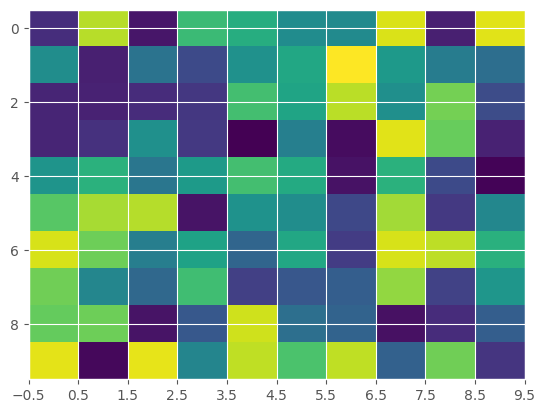

In [65]:
data = np.random.rand(10, 10)

# Create the heatmap
plt.imshow(data, cmap='viridis', aspect='auto')

# Set custom ticks and labels on the x-axis
# Center the labels between the ticks
tick_positions_major = np.arange(0, 11, 1) - 0.5  # Major tick positions at integer values
tick_positions_minor = np.arange(0.5, 10.5, 1)  # Minor tick positions at half-integer values
tick_labels = np.arange(10)  # Example labels

# Set major ticks and labels
plt.xticks(ticks=tick_positions_major, labels=tick_labels)

# Set minor ticks without labels
plt.gca().set_xticks(tick_positions_minor, minor=True)
plt.gca().set_xticklabels([], minor=True)

# Add gridlines
plt.grid(which='major', color='white', linestyle='-', linewidth=1)

# Add colorbar
plt.colorbar()

# Show plot
plt.show()